### Round 1

Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

Read that data into Python and call the dataframe churnData.


In [2]:
data = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [3]:
churndata = pd.DataFrame(data)

Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churndata['TotalCharges'] = pd.to_numeric(churndata['TotalCharges'], errors='coerce')

Check for null values in the dataframe. Replace the null values.


In [6]:
churndata.isnull().values.any()

True

In [7]:
mean_totalcharges=np.mean(churndata['TotalCharges'])
mean_totalcharges

2283.3004408418697

In [8]:
churndata['TotalCharges'].fillna(mean_totalcharges, inplace=True)

In [9]:
churndata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
 -  Split the data into a training set and a test set.

In [10]:
x = churndata[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churndata['Churn']

In [11]:
y = pd.get_dummies(y, drop_first=True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

 Scale the features either by using normalizer or a standard scaler.

In [14]:
trans = PowerTransformer()

In [15]:
trans.fit(x_train)

x_train_mod = trans.transform(x_train)
x_test_mod  = trans.transform(x_test)

 (optional)Fit a logistic Regression model on the training data.

In [16]:
log_model = LogisticRegression() 

log_model.fit(x_train_mod, y_train)

y_pred_train_log = log_model.predict(x_train_mod)
y_pred_test_log = log_model.predict(x_test_mod)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
pd.DataFrame(y_pred_train_log).value_counts()

0    4647
1     987
dtype: int64

In [18]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

,Error_metric,Train,Test
0,Accuracy,0.788782,0.801278
1,Precision,0.652482,0.699187
2,Recall,0.431925,0.455026


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


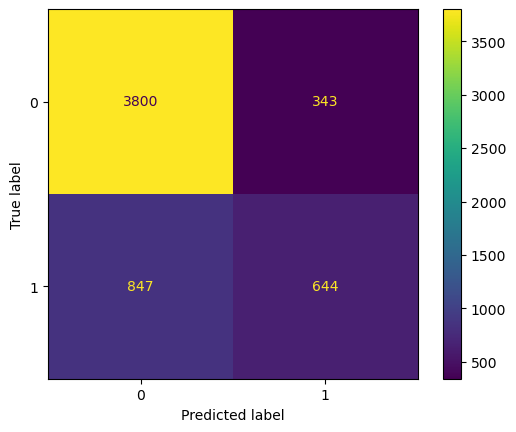



Confusion matrix for the test set
[[957  74]
 [206 172]]


C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


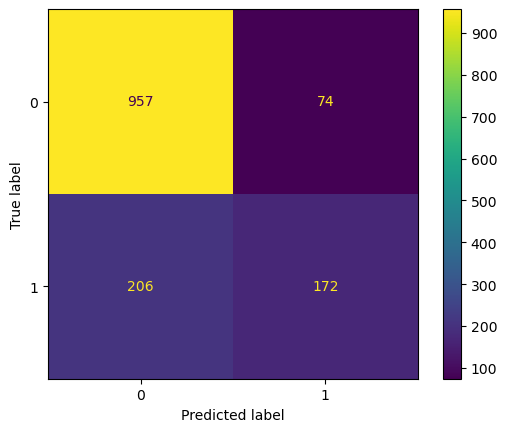

In [19]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_mod,y_test, values_format = 'd')
plt.show()

 Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [20]:
model_kn = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model_kn.fit(x_train, y_train) # train model
y_pred_kn = model_kn.predict(x_test) # predict test
y_pred_train_kn=model_kn.predict(x_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: Fu

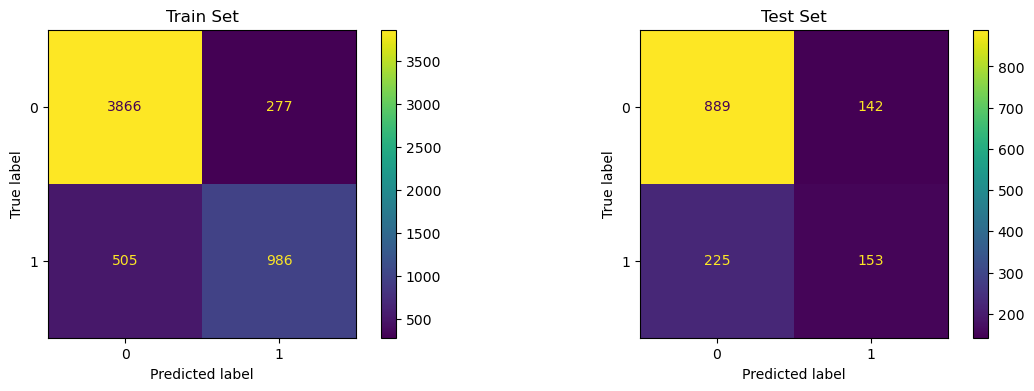

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model_kn,x_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model_kn,x_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Fit a Decision Tree Classifier on the training data.

In [22]:
model = DecisionTreeRegressor(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(x_train, y_train)

y_pred_train_dt = model.predict(x_train)
y_pred_test_dt = model.predict(x_test)


<BarContainer object of 4 artists>

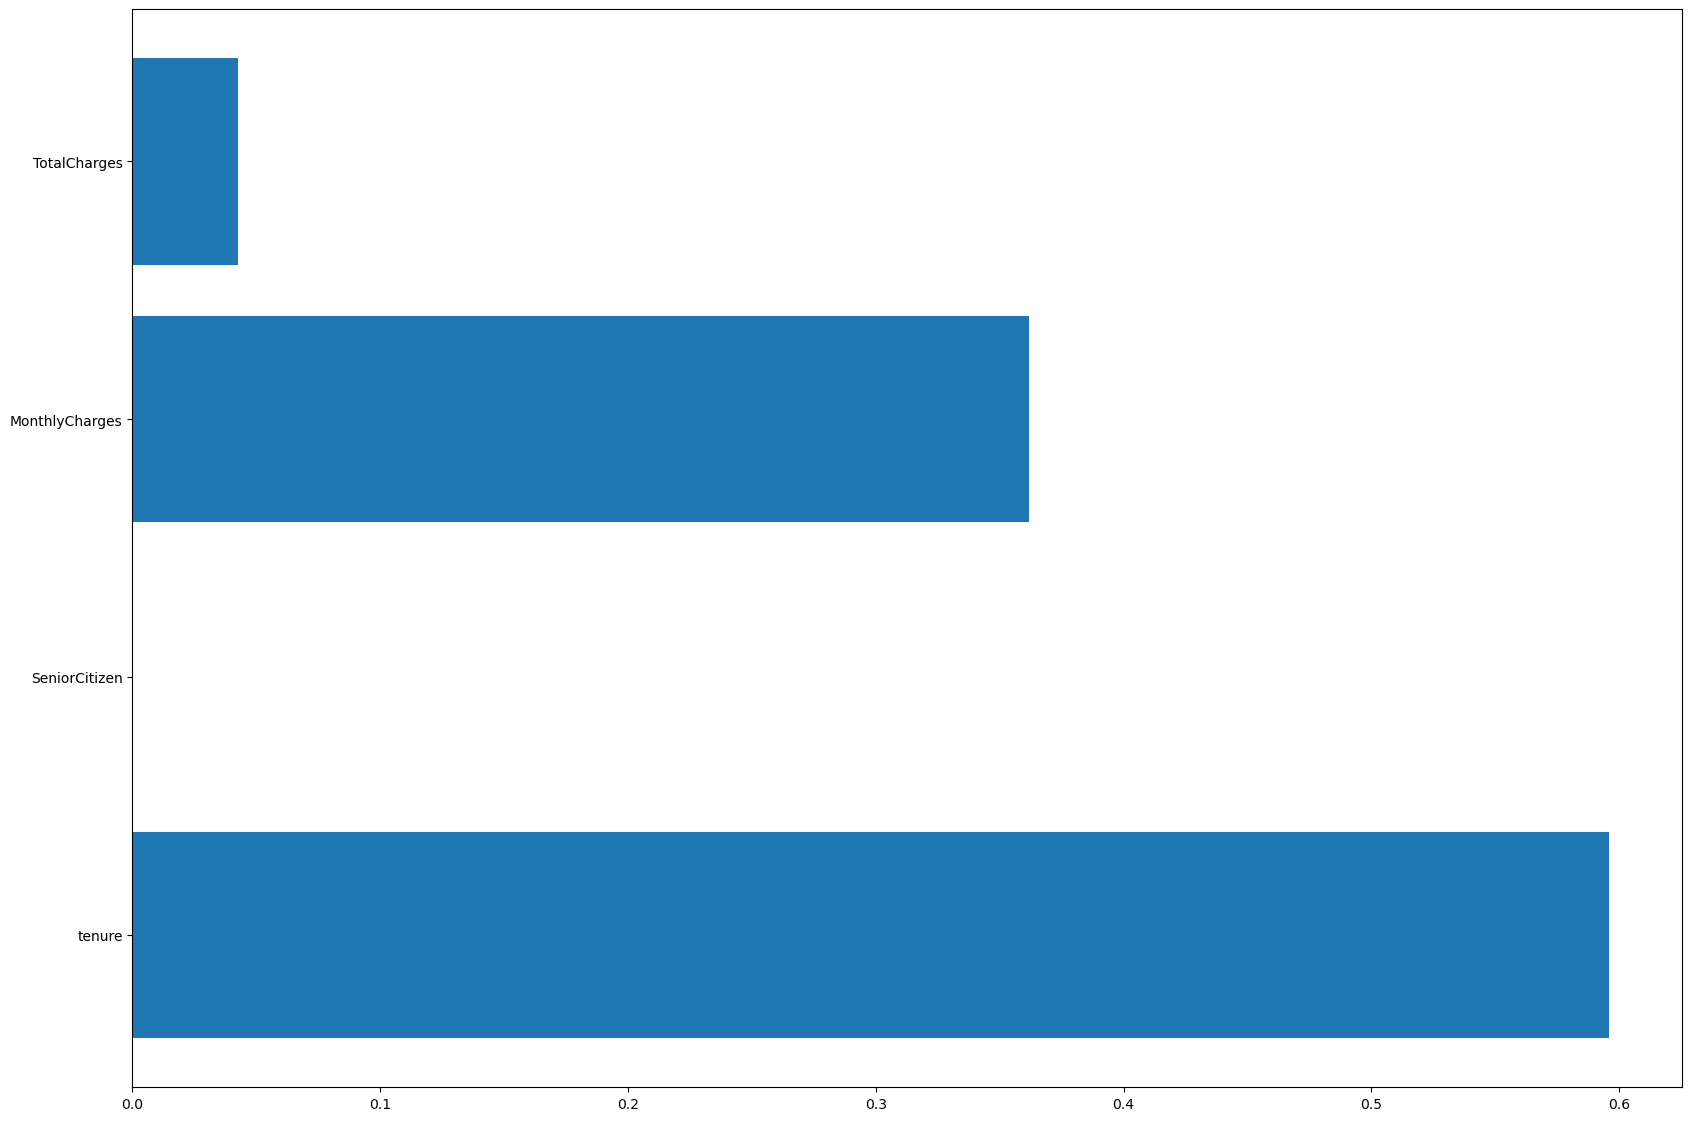

In [23]:
plt.figure(figsize=(20,14))
plt.barh(x.columns,model.feature_importances_)

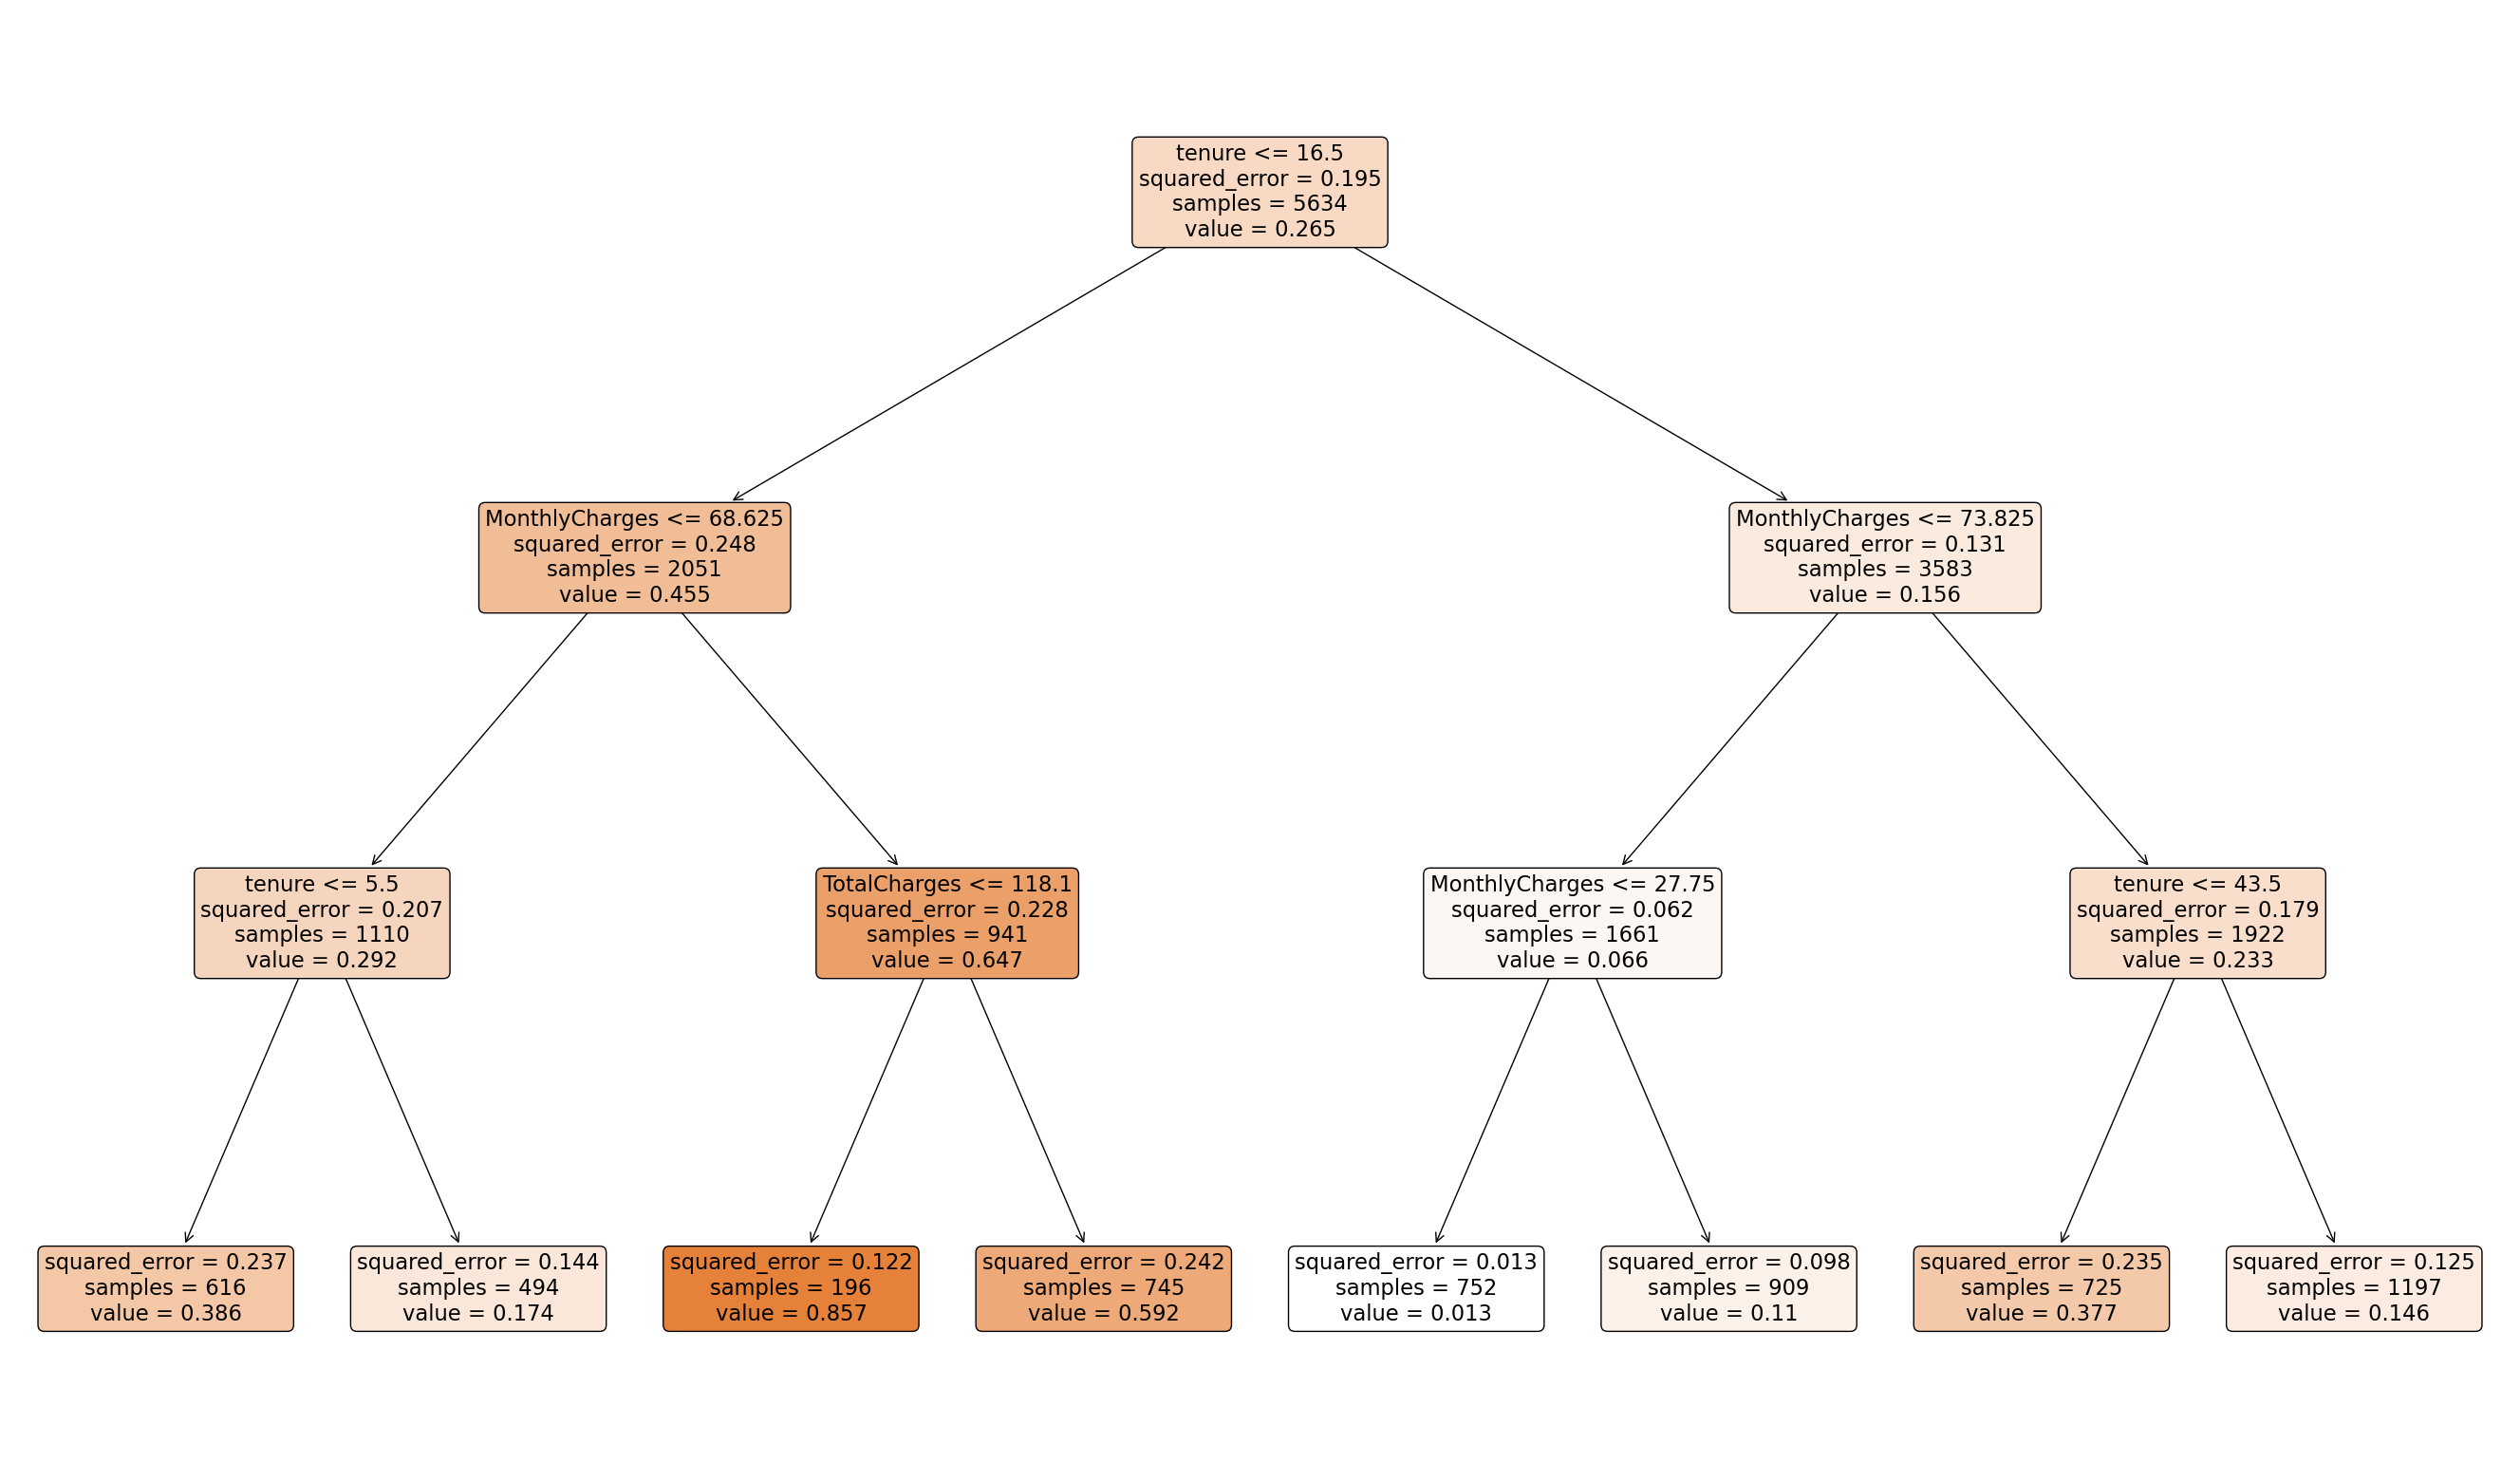

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=x.columns)
plt.show() 

Check the accuracy on the test data.

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [26]:
print("X has %d rows and %d columns"  %(x.shape[0],x.shape[1]))
print("y has %d rows"  %(y.shape[0]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("The (mean) accuracy on the test set is %.2f" %(model.score(x_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(x_train, y_train)))

X has 7043 rows and 4 columns
y has 7043 rows
The (mean) accuracy on the test set is 0.71
The (mean) accuracy on the train data is 0.99


In [27]:
scores=cross_val_score(model, x_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.70718722 0.71162378 0.70452529 0.72227152 0.72468917]
Score stats: 0.71 accuracy with a standard deviation of 0.01


In [28]:
y.value_counts()

Yes
0      5174
1      1869
dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [30]:
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)
y_train_sm.value_counts()

Yes
0      4160
1      4160
dtype: int64

In [33]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, x_train_sm, y_train_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'Regression Tree': 0.7518028846153847, 'Linear Regression': 0.7334134615384615, 'KNN': 0.7679086538461538}


C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [34]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Regression Tree,Linear Regression,KNN
score,0.751803,0.733413,0.767909


In [38]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

In [41]:
def down_samp_rand(xin, yin, ratio=1):
        from imblearn.under_sampling import RandomUnderSampler
        """Downsamples majority class using random sampling.
        Ratio argument is the ratio of minority class to the downsampled majority
        """
        rus = RandomUnderSampler(sampling_strategy=ratio, random_state=RAND_STATE)
        x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
        return x_train_rus, y_train_rus

In [42]:
x_train_rus, y_train_rus = down_samp_rand(x_train,y_train)

In [43]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, x_train_rus, y_train_rus, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.6661978072573451, 'Linear Regression': 0.7377796322407988, 'KNN': 0.6689027653880464}


C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [44]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Regression Tree,Linear Regression,KNN
score,0.666198,0.73778,0.668903


Fit a Random forest Classifier on the data and compare the accuracy

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "max_features":None,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(x_train_sm, y_train_sm)
print("train prediction accuracy score: %.2f" %(clf.score(x_train_sm, y_train_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(x_test, y_test)))

C:\Users\migue\AppData\Local\Temp\ipykernel_17416\3310541857.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_sm, y_train_sm)


train prediction accuracy score: 0.78
test prediction accuracy score: 0.73


Tune the hyper paramters with gridsearch and check the results

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50],
    'min_samples_split': [2],
    'min_samples_leaf' : [1],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=RAND_STATE)

In [48]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [49]:
grid_search.fit(x_train_sm,y_train_sm.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [50]},
             return_train_score=True)